In [1]:
import tensorflow as tf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import mnist

In [4]:
from keras.layers import Dense,Flatten,Activation,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Sequential
from keras import utils
import pickle

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [6]:
y_test[0]

7

In [7]:
y_train[0]

5

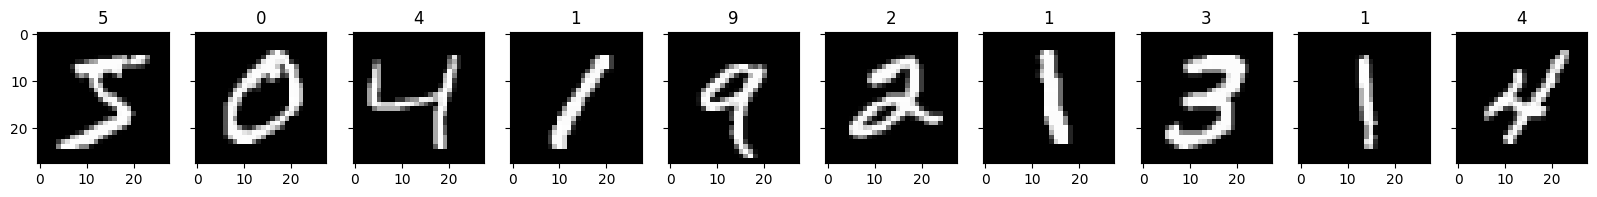

In [8]:
fig, axes = plt.subplots(ncols=10, sharex=True, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()


In [9]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

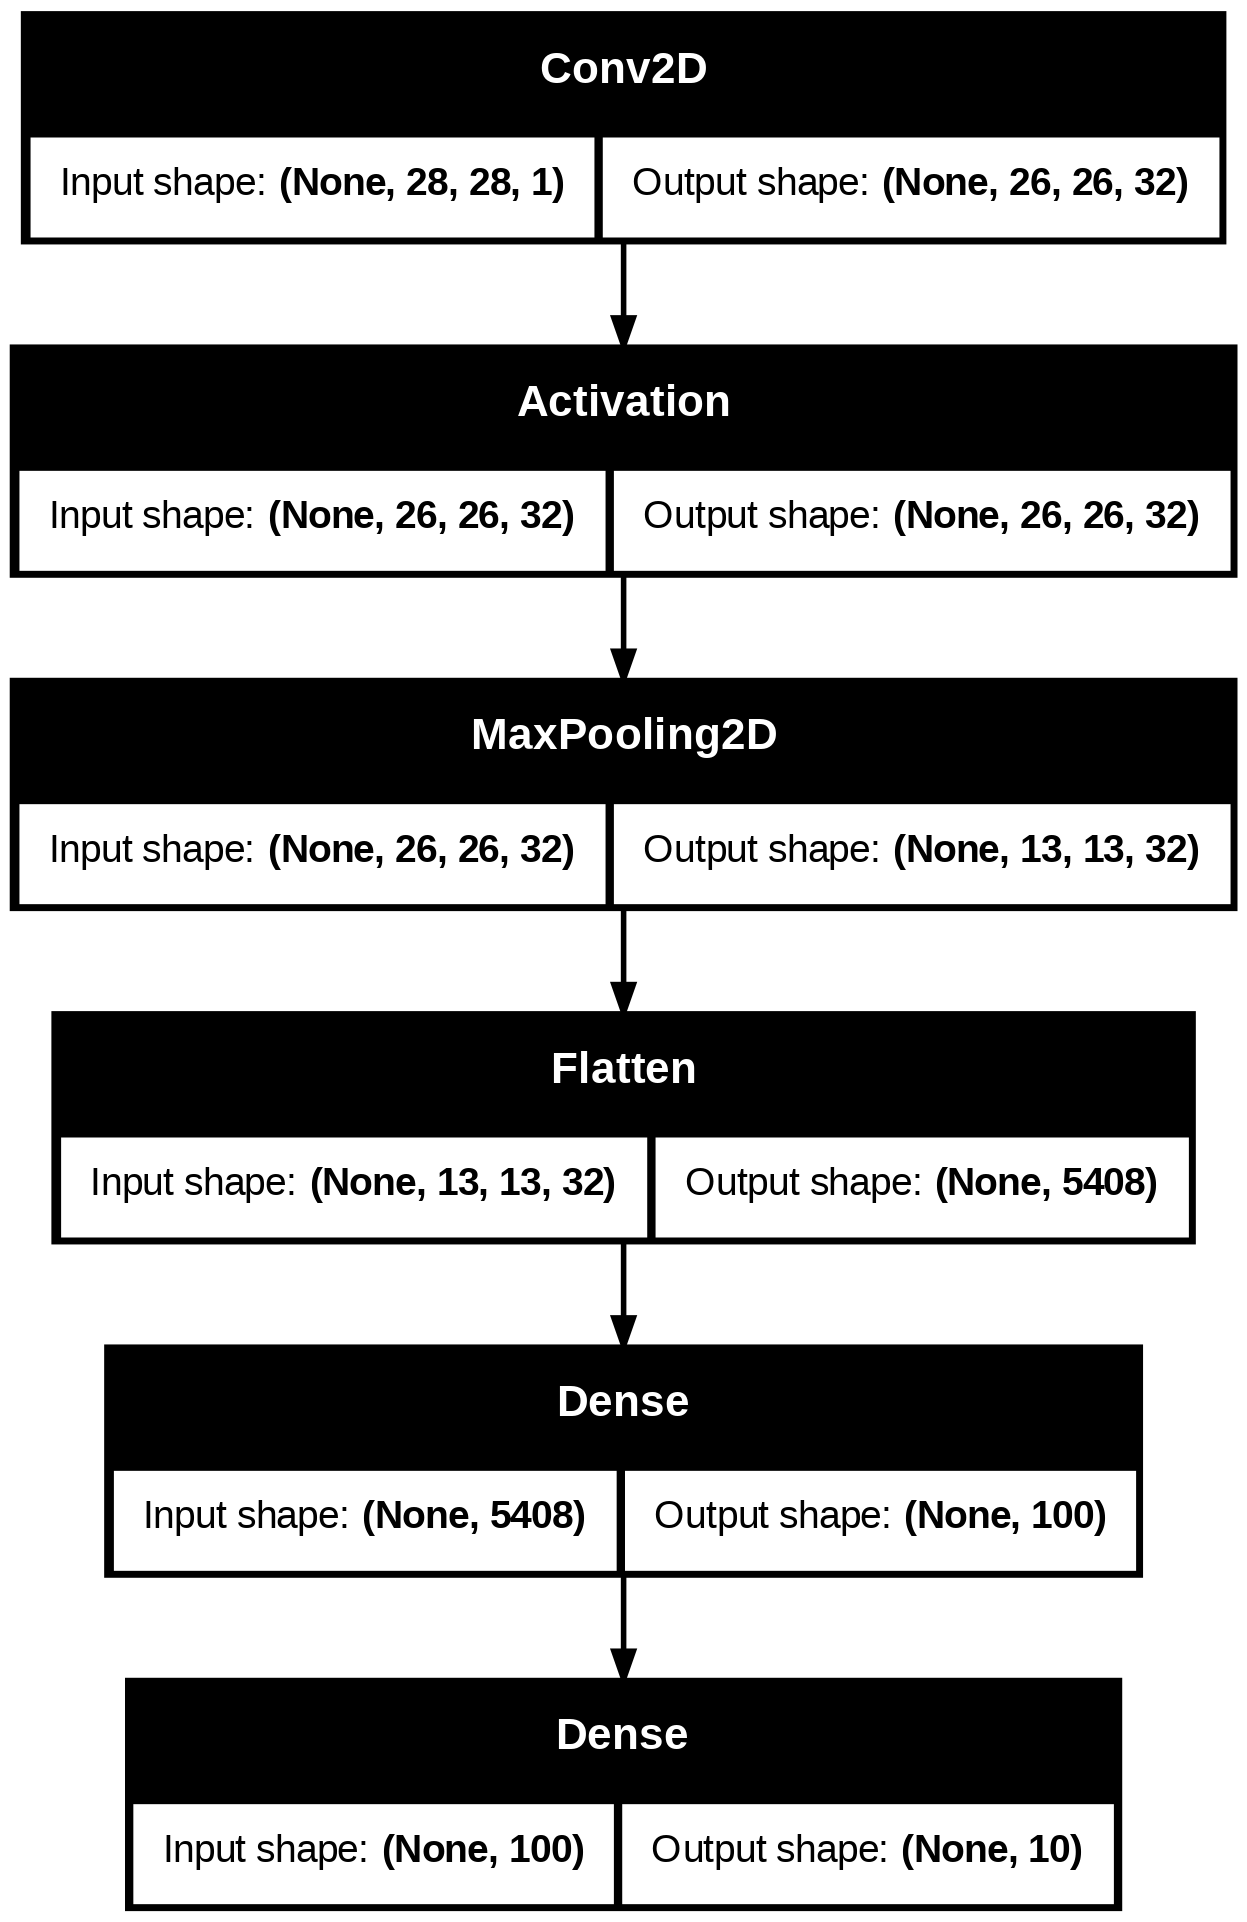

In [19]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True,expand_nested=True)

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9723 - loss: 0.0942 - val_accuracy: 0.9755 - val_loss: 0.0853
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9763 - loss: 0.0811 - val_accuracy: 0.9769 - val_loss: 0.0744
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9808 - loss: 0.0645 - val_accuracy: 0.9802 - val_loss: 0.0660
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9827 - loss: 0.0561 - val_accuracy: 0.9782 - val_loss: 0.0679
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9848 - loss: 0.0508 - val_accuracy: 0.9807 - val_loss: 0.0619


In [22]:
pickle.dump(model, open('model.pkl', 'wb'))

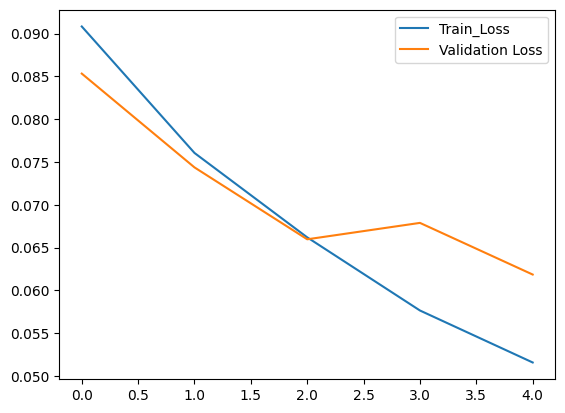

In [23]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

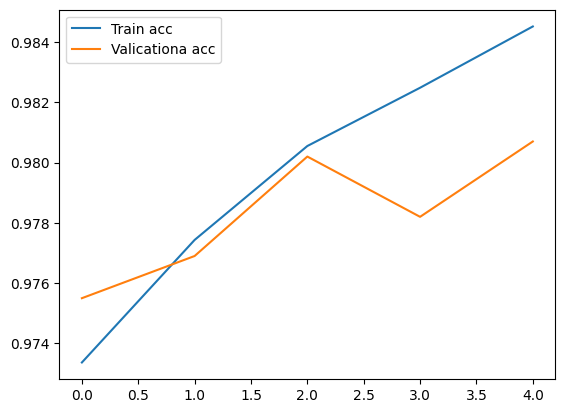

In [24]:
plt.plot(model.history.history['accuracy'],label='Train acc')
plt.plot(model.history.history['val_accuracy'],label='Valicationa acc')
plt.legend()

In [25]:
model = pickle.load(open('model.pkl', 'rb'))

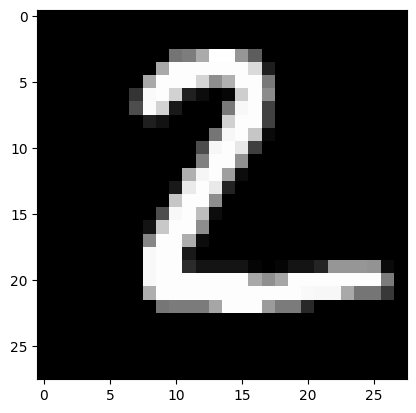

In [27]:
plt.imshow(x_test[1], cmap='gray')

In [29]:
x=np.reshape(x_test[5],(1,28,28,1))


In [30]:
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1

In [31]:
x

array([[[[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         [